In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train, y_train),(x_test,y_test) = datasets.cifar10.load_data()

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
x_test.shape

(10000, 32, 32, 3)

In [6]:
y_test.shape

(10000, 1)

In [7]:
y_train = y_train.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

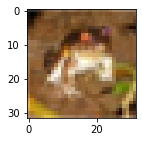

In [8]:
plt.figure(figsize=(12,2))
plt.imshow(x_train[0])

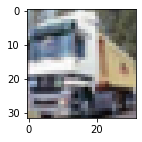

In [9]:
plt.figure(figsize=(12,2))
plt.imshow(x_train[1])

In [10]:
y_train[1]

9

In [11]:
x_train = x_train/255

In [12]:
x_test = x_test/255

In [13]:
ann = models.Sequential([layers.Flatten(input_shape=(32,32,3)),layers.Dense(4000,activation = 'relu'),
                       layers.Dense(2000,activation = 'relu'),layers.Dense(2000,activation = 'sigmoid')])

In [14]:
ann.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [15]:
ann.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 203s 129ms/step - loss: 1.8981 - accuracy: 0.3239
Epoch 2/10
1563/1563 [==============================] - 218s 140ms/step - loss: 1.6661 - accuracy: 0.4007
Epoch 3/10
1563/1563 [==============================] - 206s 132ms/step - loss: 1.5826 - accuracy: 0.4320
Epoch 4/10
1563/1563 [==============================] - 214s 137ms/step - loss: 1.5267 - accuracy: 0.4531
Epoch 5/10
1563/1563 [==============================] - 222s 142ms/step - loss: 1.4857 - accuracy: 0.4679
Epoch 6/10
1563/1563 [==============================] - 214s 137ms/step - loss: 1.4561 - accuracy: 0.4783
Epoch 7/10
1563/1563 [==============================] - 227s 145ms/step - loss: 1.4290 - accuracy: 0.4863
Epoch 8/10
1563/1563 [==============================] - 218s 140ms/step - loss: 1.4006 - accuracy: 0.5024
Epoch 9/10
1563/1563 [==============================] - 205s 131ms/step - loss: 1.3792 - accuracy: 0.5082
Epoch 10/10
1563/1563 [=======================

In [16]:
## Build a CNN
cnn = models.Sequential([layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
                        layers.MaxPooling2D((2,2)),
                        layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
                        layers.MaxPooling2D((2,2)),
                        layers.Dropout((0.2)),
                        layers.Flatten(),
                        layers.Dense(64,activation='relu'),
                        layers.Dense(32,activation='relu'),
                        layers.Dense(10,activation='softmax'),])

In [17]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [18]:
cnn.fit(x_train,y_train,epochs=20)

Epoch 1/20
1563/1563 [==============================] - 55s 34ms/step - loss: 1.5654 - accuracy: 0.4295
Epoch 2/20
1563/1563 [==============================] - 46s 29ms/step - loss: 1.2249 - accuracy: 0.5680
Epoch 3/20
1563/1563 [==============================] - 47s 30ms/step - loss: 1.1019 - accuracy: 0.6114
Epoch 4/20
1563/1563 [==============================] - 48s 31ms/step - loss: 1.0278 - accuracy: 0.6389
Epoch 5/20
1563/1563 [==============================] - 46s 30ms/step - loss: 0.9686 - accuracy: 0.6608
Epoch 6/20
1563/1563 [==============================] - 45s 29ms/step - loss: 0.9277 - accuracy: 0.6757
Epoch 7/20
1563/1563 [==============================] - 42s 27ms/step - loss: 0.8877 - accuracy: 0.6876
Epoch 8/20
1563/1563 [==============================] - 44s 28ms/step - loss: 0.8542 - accuracy: 0.6994
Epoch 9/20
1563/1563 [==============================] - 43s 27ms/step - loss: 0.8281 - accuracy: 0.7083
Epoch 10/20
1563/1563 [==============================] - 44s 28m

In [19]:
y_test = y_test.reshape(-1,)

In [20]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.8262 - accuracy: 0.7149


[0.8262274265289307, 0.714900016784668]

In [21]:
y_pred = cnn.predict(x_test)

313/313 [==============================] - 3s 9ms/step


In [22]:
y_pred = np.argmax(y_pred,axis=1)

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75      1000
           1       0.84      0.84      0.84      1000
           2       0.56      0.65      0.60      1000
           3       0.46      0.63      0.53      1000
           4       0.75      0.60      0.67      1000
           5       0.68      0.51      0.58      1000
           6       0.79      0.80      0.79      1000
           7       0.82      0.72      0.77      1000
           8       0.82      0.84      0.83      1000
           9       0.79      0.82      0.80      1000

    accuracy                           0.71     10000
   macro avg       0.73      0.71      0.72     10000
weighted avg       0.73      0.71      0.72     10000

